## **Accesibilidad De Internet**

En este notebook nos haremos un analisis exploratorio de los datos que se encuentran en el Dataset. Nuestro objetivo principal es aplicar metodos matematicos y el uso de graficos con el fin de encontrar informacion util como:

* Outliers
* Quartiles
* Metodos estadisticos (Moda, Media, Mediana, Varianza, Desviacion Estandar)
* Stack Ranks

Nuestro codigo se repartira en distintas secciones teniendo una similitud con el patron Modelo - Vista - Controlador (MVC):

Celda de librerias.
Celda de acciones.
Celda de vistas.

## **Enfoque**

Los datos que tomaremos para el ejercicio sera:

* "data\Internet_Penetracion.csv"
* "data\Internet_Accesos-por-tecnologia.csv"
* "data\Internet_BAF.csv"

Esto nos permitira observar la penetracion que se ha tenido durante los ultimos 8 años, el tipo de tecnologia utilizados y los tipos de accesos mas recurrentes dentro de las provincias. De esta manera podremos tener una perspectiva global de como Argentina se ha desarrollado durante esta ultima decada a nivel tecnologico y de conectividad. Este ejercicio solo pretender observar el desarrollo del uso del internet fijo o de hogar.


## 1. Librerias
Esta celda nos ayudara a cargar las librerias necesarias y extraer los Datasets necesarios.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #Estandarizamos los diseños de la grafica

#ignorar Warnings
import warnings
warnings.filterwarnings("ignore")


#Carga del dataset
inter_hogar = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_Penetracion.csv", sep=",")
inter_access = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_BAF.csv",sep=",")
inter_tech = pd.read_csv("C:\\Users\\andre\\Documents\\Py Codes\\data\\Internet_Accesos-por-conectividad.csv",sep=",")

## 2. Acciones
Esta celda nos ayudara a crear todas las funciones que se vayan requiriendo durante el ejercicio.

## 3. Vistas
Las siguientes celdas se enfocaran en el analisis exploratorio de los distintos Datasets

## 3.1 Internet Penetracion EDA

Las columnas encontradas en este Dataset que tomaremos en cuenta son:

* Año
* Acceso por cada 100 hogares
* Accesos por cada 100 hab
* Periodo

## 3.1.1 Agrupacion de datos y observacion en el tiempo

Agrupemos los datos por Año y por Trimestre con el objetivo de analizar la accesibilidad tanto por hogares como por habitantes.

In [3]:
inter_hogar.value_counts().sort_index().head(20)

Año   Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  Periodo      
2014  1          49.55                         15.05                     Ene-Mar 2014     1
      2          49.86                         15.16                     Abr-Jun 2014     1
      3          50.67                         15.43                     Jul-Sept 2014    1
      4          50.50                         15.39                     Oct-Dic 2014     1
2015  1          51.36                         15.68                     Ene-Mar 2015     1
      2          51.76                         15.82                     Abr-Jun 2015     1
      3          52.46                         16.05                     Jul-Sept 2015    1
      4          52.63                         16.12                     Oct-Dic 2015     1
2016  1          51.85                         15.90                     Ene-Mar 2016     1
      2          53.34                         16.37                     Abr-Jun 2016

In [4]:
inter_hogar.value_counts().sort_index().tail(20)

Año   Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  Periodo      
2018  1          58.82                         18.12                     Ene-Mar 2018     1
      2          59.16                         18.24                     Abr-Jun 2018     1
      3          60.69                         18.73                     Jul-Sept 2018    1
      4          61.42                         18.97                     Oct-Dic 2018     1
2019  1          62.48                         19.31                     Ene-Mar 2019     1
      2          64.53                         19.96                     Abr-Jun 2019     1
      3          65.79                         20.36                     Jul-Sept 2019    1
      4          62.92                         19.49                     Oct-Dic 2019     1
2020  1          62.86                         19.48                     Ene-Mar 2020     1
      2          64.21                         19.92                     Abr-Jun 2020

## Observaciones: 
* La accesibilidad respecto a la adquisicion de internet en el hogar aumento gradualmente conforme pasaban los años.

* De la misma manera, vemos como por cada 100 habitantes, el acceso de este servicio fue aumentando.

## 3.1.2 Outliers

    Analicemos si encontramos Outliers tanto para los hogares como habitantes. A primera vista puede que no encontremos valores que se encuentren por fuera de lo normal debido a la continuidad dentro de nuestros datos

In [5]:
iqr = inter_hogar["Accesos por cada 100 hogares"].quantile(0.75) - inter_hogar["Accesos por cada 100 hogares"].quantile(0.25) #rango intercuartil

umbral_sup = inter_hogar["Accesos por cada 100 hogares"].quantile(0.75) + 1.5 * iqr
umbral_inf = inter_hogar["Accesos por cada 100 hogares"].quantile(0.25) -1.5 * iqr

outliers_sup = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hogares"] > umbral_sup]
outliers_inf = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hogares"]  < umbral_inf]

print(f"""Outliers superiores - hogares: {outliers_sup.values}
Outliers inferiores - hogares: {outliers_inf.values}""")

print(""" """)

iqr = inter_hogar["Accesos por cada 100 hab"].quantile(0.75) - inter_hogar["Accesos por cada 100 hab"].quantile(0.25) #rango intercuartil

umbral_sup = inter_hogar["Accesos por cada 100 hab"].quantile(0.75) + 1.5 * iqr
umbral_inf = inter_hogar["Accesos por cada 100 hab"].quantile(0.25) -1.5 * iqr

outliers_sup = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hab"] > umbral_sup]
outliers_inf = inter_hogar["Año"][inter_hogar["Accesos por cada 100 hab"]  < umbral_inf]

print(f"""Outliers superiores - habitantes: {outliers_sup.values}
Outliers inferiores - habitantes: {outliers_inf.values}""")

Outliers superiores - hogares: []
Outliers inferiores - hogares: []
 
Outliers superiores - habitantes: []
Outliers inferiores - habitantes: []


## Observaciones:
* Como habiamos predicho, no hay valores de outliers debido a la uniformidad de los valores en nuestra base de datos

## 3.1.3 Cambio en el tiempo y aceptacion

Analicemos la adquisicion del servicio de internet entre los años 2014 y 2022

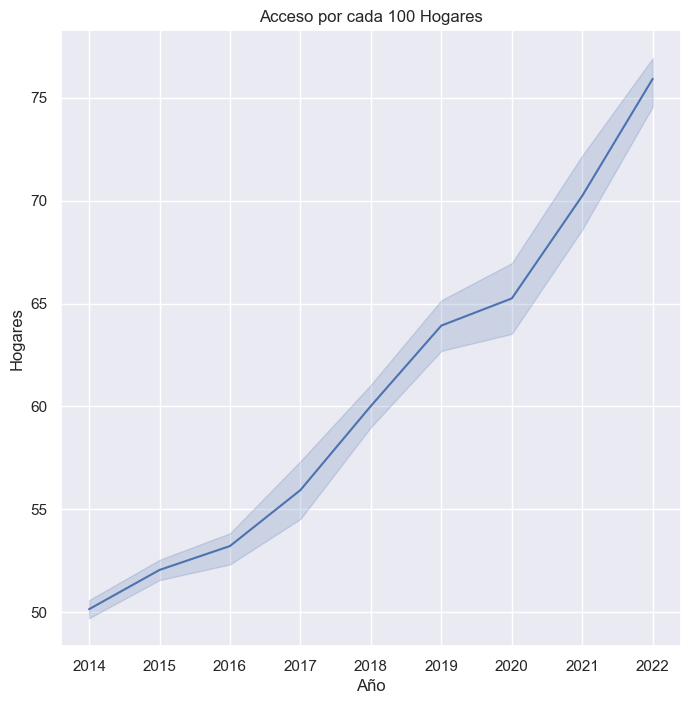

In [6]:
#Plots------------------------------------------------------------------
plt.figure(figsize=(8,8))

sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hogares")
plt.xlabel("Año")
plt.ylabel("Hogares")
plt.title("Acceso por cada 100 Hogares")
ax = plt.gca()
plt.show()

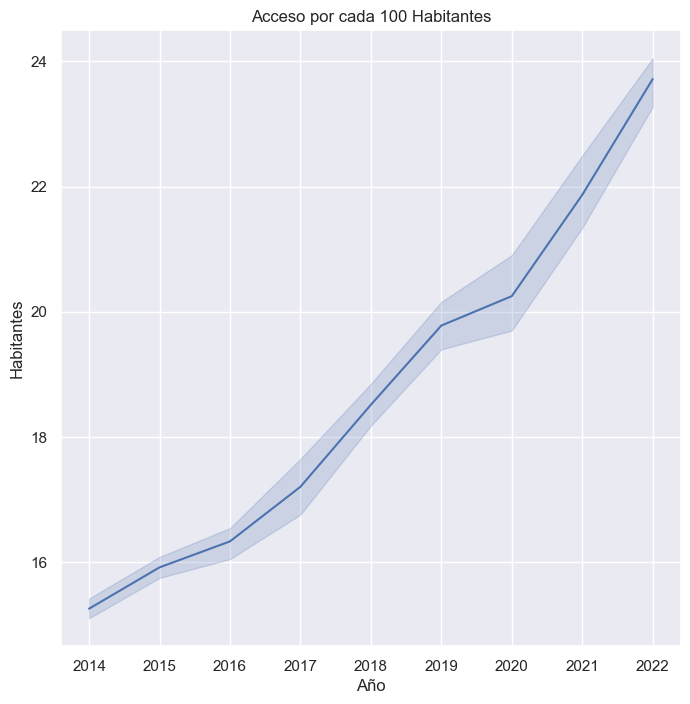

In [7]:
plt.figure(figsize=(8,8))
sns.lineplot(inter_hogar, x="Año", y = "Accesos por cada 100 hab")
plt.xlabel("Año")
plt.ylabel("Habitantes")
plt.title("Acceso por cada 100 Habitantes")
ax = plt.gca()
plt.show()

In [8]:
#Maximos y minimos.

#Hogares----------------------------------------------------
inter_hogar_anio = inter_hogar[["Año", "Accesos por cada 100 hogares"]]
inter_hogar_anio = pd.DataFrame(inter_hogar_anio.groupby("Año").sum()).reset_index()
max_anio = int(inter_hogar_anio.max().iloc[0])
min_anio = int(inter_hogar_anio.min().iloc[0])
delta = ((inter_hogar_anio.max().iloc[1] - inter_hogar_anio.min().iloc[1])/inter_hogar_anio.min().iloc[1])*100

print(f"""Año con mayor acceso a internet por hogares: {max_anio}
Año con menor acceso a internet por hogares: {min_anio}
Cambio porcentual entre el {min_anio} - {max_anio}: {round (delta,2)}% \n""")


#Habitantes--------------------------------------------------------
inter_hogar_anio = inter_hogar[["Año", "Accesos por cada 100 hab"]]
inter_hogar_anio = pd.DataFrame(inter_hogar_anio.groupby("Año").sum()).reset_index()
max_anio = int(inter_hogar_anio.max().iloc[0])
min_anio = int(inter_hogar_anio.min().iloc[0])
delta = ((inter_hogar_anio.max().iloc[1] - inter_hogar_anio.min().iloc[1])/inter_hogar_anio.min().iloc[1])*100

print(f"""Año con mayor acceso a internet por habitantes: {max_anio}
Año con menor acceso a internet por habitantes: {min_anio}
Cambio porcentual entre el {min_anio} - {max_anio}: {round(delta,2)}% \n""")

#Cambios entre el 2020 y 2021-----------------------------------

inter_filtro = pd.DataFrame(inter_hogar.groupby("Año").sum()).reset_index()
anio_2020 = inter_hogar[inter_hogar["Año"] == 2020].iloc[0]
anio_2021 = inter_hogar[inter_hogar["Año"] == 2021].iloc[0]

#Hogares
anio_2020_valor = anio_2020[2]
anio_2021_valor = anio_2021[2]
delta = round(
    ((anio_2021_valor - anio_2020_valor) / anio_2020_valor)*100
    ,2)
print(f"El salto en el uso de internet en hogares entre el 2020 y 2021 es: {delta}%\n")

#Habitantes
anio_2020_valor = anio_2020[3]
anio_2021_valor = anio_2021[3]
delta = round(
    ((anio_2021_valor - anio_2020_valor) / anio_2020_valor)*100
    ,2)
print(f"El salto en el uso de internet por habitantes entre el 2020 y 2021 es de: {delta}%\n")

Año con mayor acceso a internet por hogares: 2022
Año con menor acceso a internet por hogares: 2014
Cambio porcentual entre el 2014 - 2022: 51.41% 

Año con mayor acceso a internet por habitantes: 2022
Año con menor acceso a internet por habitantes: 2014
Cambio porcentual entre el 2014 - 2022: 55.45% 

El salto en el uso de internet en hogares entre el 2020 y 2021 es: 8.22%

El salto en el uso de internet por habitantes entre el 2020 y 2021 es de: 8.57%



## Observaciones:

* Entre el año 2014 y 2022 hubo un incremento del 51.41% en hogares que adquirieron el servicio de internet en toda argentina.

* En este mismo periodo, mas personas de manera individual adquirieron el servicio aumentando asi su accesibilidad a un 55.45%

* Graficamente podemos notar un salto desde el 2020 en ambos sectores demograficos, esto se debe al inicio de la pandemia Covid-19. Claramente las personas, al encontrarse encerradas obtaron  por usar mas internet. Este aumento, considerando años anteriores, es de un 7.64% para hogares y 7.99% para habitantes.

Hay que tener en cuenta que estos ultimos porcentajes representan:
* 7.64% = 1.3 Millones de hogares argentinos censados en 2021

* 7.99% = 3.65 millones de habitantes argentinos censados en 2021

## 3.2 Accesos por tecnologia y conectividad EDA

En este espacio trabajaremos dos datasets en conjuntos ya que conceptualmente se relacionan entre si. Es decir, el dataset "data\Internet_BAF.csv" nos muestra los tipos de conectividad existente dentro de las provincias argentinas como puntos de acceso. Esto es: __Banda Ancha__ y __Dial Up__.
Es importante resaltar que estos tipos de conectividad son muy diferentes entre si ya que el __Dial Up__ cuenta con una antiguedad mucho mayor que la __Banda Ancha__.
Y el dataset "data\lista_localidad_conectividad_internet.csv" nos habla de la tecnologia utilizada para cubrir el servicio de internet dentro de las distintias provincias. Aca se veran reflejadas tecnologias como:

* ADSL
* Cablemoden
* Fibra Optica
* Wireless
* Otros

## 3.2.1 Correlacion entre Datasets

Aunque los datasets se encuentran correlacionados conceptualmente, vamos a revisar si esta se presenta tambien de manera numerica. 

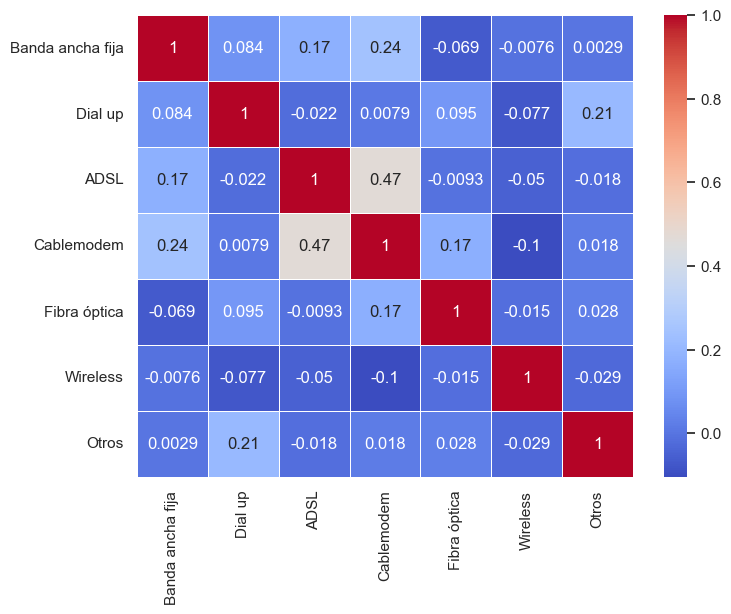

In [9]:
#Obtenemos las columnas que nos interesan y que se encuentren en un formato numerico

get_col=['ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros']
test_inter_tech = inter_tech[get_col]

get_col=[ 'Banda ancha fija', 'Dial up']
test_inter_access = inter_access[get_col]

#Concatenamos los datasets y creamos una matriz de correlacion
df = pd.concat([test_inter_access,test_inter_tech], axis=1)
correlacion_matriz = df.corr()

#Ploteamos un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion_matriz, annot= True, cmap="coolwarm", linewidths=0.5)
plt.show()


## Observaciones:
Como se habia predicho anteriormente los datos no tienen ninguna correlacion, esto se debe a su valor cercano a 0. Pero, conceptualmente esto tiene sentido ya que los puntos de acceso (Banda Ancha y Dial Up) nos permiten utilizar distintos tipos de tecnologia para conectarnos a la red.

## 3.2.2 Puntos de acceso

En este apartado revisaremos que provincias han dando un salto al obtener mas puntos de accesos.]

In [10]:
#Vamos a crear varios dataframe que nos permita ver el delta de las provincias en el tiempo y filtros necesarios

median_values = inter_access.groupby(['Año', 'Provincia']).median().reset_index().drop(columns="Trimestre")
dicc_media = {}
actualizacion_banda = []
actualizacion_dial = []
actualizacion_total = []

for provincia in median_values["Provincia"].unique():
    mediana_aux = median_values[median_values["Provincia"] == provincia]
    mediana_aux['Cambio_banda_ancha'] = mediana_aux.groupby('Provincia')['Banda ancha fija'].pct_change() * 100
    media_aux = mediana_aux["Cambio_banda_ancha"].mean()
    actualizacion_banda.append(media_aux)

for provincia in median_values["Provincia"].unique():
    mediana_aux = median_values[median_values["Provincia"] == provincia]
    mediana_aux['Cambio_dial'] = mediana_aux.groupby('Provincia')['Dial up'].pct_change() * 100
    media_aux = mediana_aux["Cambio_dial"].mean()
    actualizacion_dial.append(media_aux)
    
for provincia in median_values["Provincia"].unique():
    mediana_aux = median_values[median_values["Provincia"] == provincia]
    mediana_aux['Cambio_total'] = mediana_aux.groupby('Provincia')['total'].pct_change() * 100
    media_aux = mediana_aux["Cambio_total"].mean()
    actualizacion_total.append(media_aux)

dicc_media["Provincia"] = list(median_values["Provincia"].unique())
dicc_media["crecimiento_banda_ancha"] = actualizacion_banda
dicc_media["crecimiento_dial_up"] = actualizacion_dial
dicc_media["crecimiento_total"] = actualizacion_total
inter_access_actualizacion = pd.DataFrame(dicc_media)

#Dataframe que maneja filtros

inter_access_filtro = inter_access[["Año","Trimestre", "Provincia", "total"]]
inter_access_filtro = inter_access_filtro[inter_access_filtro["Año"] == 2022]
puntos_acceso_2022 = inter_access_filtro[inter_access_filtro["Trimestre"] == 4].sort_values(by="total")


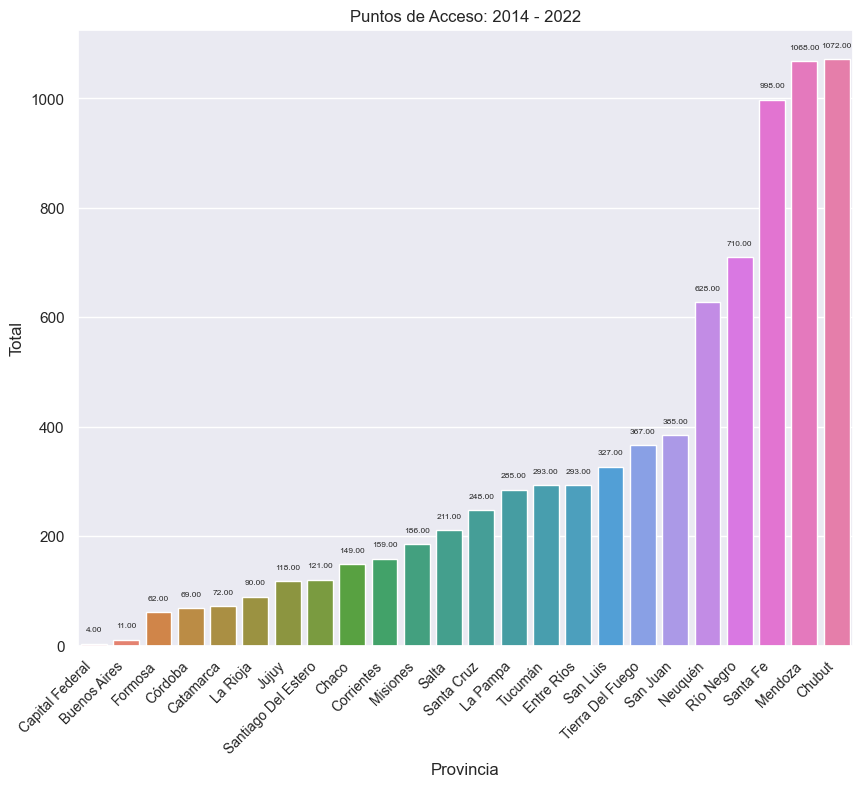

In [11]:
#Vamos a hacer algunos plots
plt.figure(figsize=(10,8))

# Plot: Puntos de Acceso en provincias 2014 - 2022
ax = sns.barplot(data=puntos_acceso_2022,x="Provincia", y="total", hue="Provincia")
plt.xticks(rotation=45, ha='right',fontsize = 10)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',size = 6)
plt.ylabel("Total")
plt.title("Puntos de Acceso: 2014 - 2022")
plt.show()



## Observaciones:

* La provincia con mas puntos de accesos al año 2022 es Chubut con un total de  1072 en los cuales se encuentran distribuidos entre banda ancha y dial up. Otras provincias que destacan son Mendoza y Santa fe con valores parecidos.

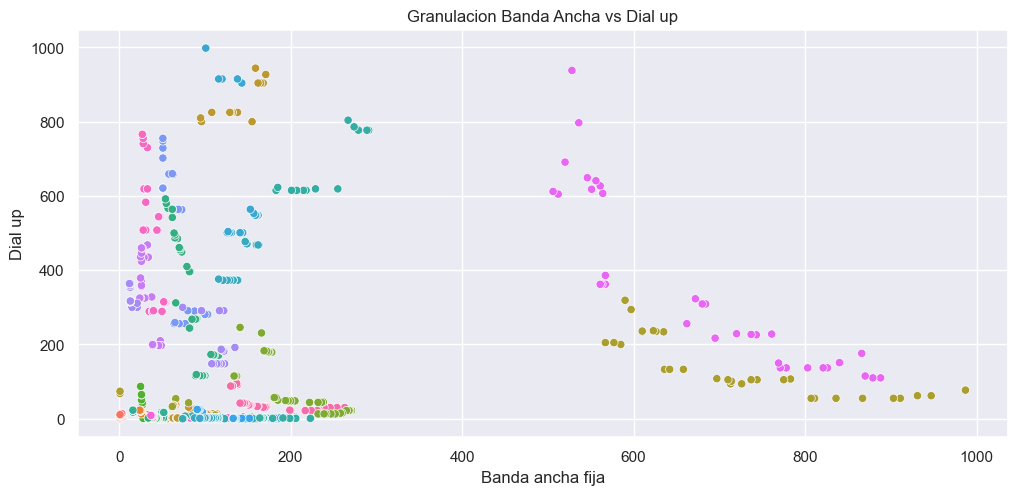

In [12]:
#Vamos a hacer algunos plots
plt.figure(figsize=(12,18))

#Plot: Granulacion Banda Ancha Vs Dial up
plt.subplot(3,1,2)
sns.scatterplot(data=inter_access,x="Banda ancha fija", y="Dial up", hue="Provincia", legend=False)
plt.title("Granulacion Banda Ancha vs Dial up")
plt.show()

## Observaciones:

* Muchas provincias, durante el tiempo, se han mantenido usando la tecnologia de Dial Up. Esto puede tener varios significados como que hay bastantes zonas rurales o de dificil acceso dentro de las provincias o las provincias han ido actualizando gradualmente sus redes disminuyendo el dial up y aumentando la banda ancha. Esto se puede apreciar en la granulacion morada y amarilla.


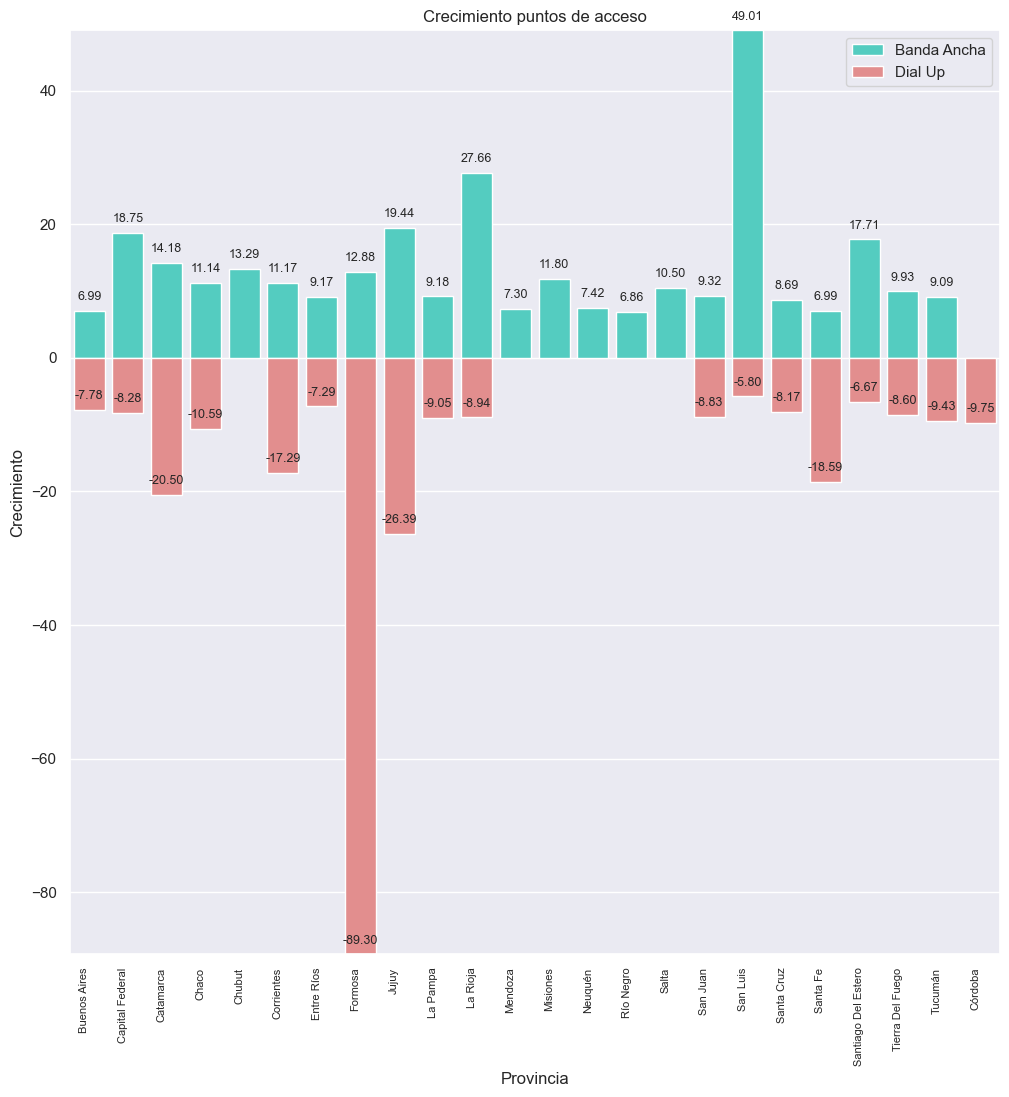

In [13]:
#Vamos a hacer algunos plots
plt.figure(figsize=(12,12))

#Plot: Pronvincias salto a puntos de acceso
#Barras positivas
ax = sns.barplot(inter_access_actualizacion[inter_access_actualizacion["crecimiento_banda_ancha"]>=0], x="Provincia",y="crecimiento_banda_ancha", color="turquoise",label="Banda Ancha")

#Barras negativas
ax = sns.barplot(inter_access_actualizacion[inter_access_actualizacion["crecimiento_dial_up"]<0], x="Provincia",y="crecimiento_dial_up", color="lightcoral",label="Dial Up")

# Ajustar el eje y para incluir valores negativos
plt.ylim(inter_access_actualizacion['crecimiento_dial_up'].min(), inter_access_actualizacion['crecimiento_banda_ancha'].max())

#Valores de barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',size = 9)
# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Crecimiento')
plt.title('Crecimiento puntos de acceso')
plt.xticks(rotation=90, ha='right',fontsize = 8)

# Mostrar la leyenda
plt.legend()
plt.show()

## Observaciones:

* Tambien podemos observar que muchas provincias han tenido un esfuerzo por querer mejorar su tecnologia respecto a las redes. Destacando la provincia de San Luis con un aumento del uso de banda ancha en 49% entre el 2014 y 2022.

* Se puede destacar que la provincia de Formosa disminuyo en un 89.30% el uso del Dial Up. Esto se debe al proyecto "Formosa Conectada" donde se creo una red de fibra optica de 1642 km conectando varias localidades e instituciones (https://www.pagina12.com.ar/diario/elpais/1-283369-2015-10-08.html)
